#### Part 1.1 a - Read ‘Car name.csv’ as a DataFrame and assign it to a variable. 1 pts

In [2]:
# importing the pacakages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading the car names file
df_carnames=pd.read_csv("Carname.csv")

In [4]:
df_carnames.head()

car_name
0  chevrolet chevelle malibu
1          buick skylark 320
2         plymouth satellite
3              amc rebel sst
4                ford torino

#### Part 1.1 b - Read ‘Car-Attributes.json as a DataFrame and assign it to a variable. 1 pts 

In [5]:
#  reading the car attributes json file
df_carattributes=pd.read_json("CarAttributes.json")

In [6]:
df_carattributes.head()

mpg  cyl   disp   hp    wt   acc  yr  origin
0  18.0    8  307.0  130  3504  12.0  70       1
1  15.0    8  350.0  165  3693  11.5  70       1
2  18.0    8  318.0  150  3436  11.0  70       1
3  16.0    8  304.0  150  3433  12.0  70       1
4  17.0    8  302.0  140  3449  10.5  70       1

#### Part 1.1 c - Merge both the DataFrames together to form a single DataFrame 2 pts

In [7]:
df_carnames.shape


(398, 1)

In [8]:
df_carattributes.shape

(398, 8)

In [9]:
#merge the two dataframes of car names and car attributes as single dataframe
df_carnames.reset_index(drop=True, inplace=True)
df_carattributes.reset_index(drop=True, inplace=True)
merged_df = pd.concat([df_carnames, df_carattributes], axis=1)

In [10]:
merged_df.head()

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1

#### Part 1.1 d - Print 5 point summary of the numerical features and share insights. 1 pts

In [11]:
merged_df.describe()

mpg         cyl        disp           wt         acc  \
count  398.000000  398.000000  398.000000   398.000000  398.000000   
mean    23.514573    5.454774  193.425879  2970.424623   15.568090   
std      7.815984    1.701004  104.269838   846.841774    2.757689   
min      9.000000    3.000000   68.000000  1613.000000    8.000000   
25%     17.500000    4.000000  104.250000  2223.750000   13.825000   
50%     23.000000    4.000000  148.500000  2803.500000   15.500000   
75%     29.000000    8.000000  262.000000  3608.000000   17.175000   
max     46.600000    8.000000  455.000000  5140.000000   24.800000   

               yr      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000

#### Insights:

mpg: Cars' average fuel efficiency is 23.51 mpg, ranging from 9 to 46.6 mpg.

cyl: Most cars have 4 to 8 cylinders, with an average of 5.45 cylinders.

disp: Average engine displacement is 193.43 cubic inches, ranging from 68 to 455 cubic inches.

wt: Cars weigh, on average, 2970.42 pounds, with weights ranging from 1613 to 5140 pounds.

acc: Average acceleration time is 15.57 seconds (0-60 mph), ranging from 8.0 to 24.8 seconds.

origin: Cars originate from regions coded 1 to 3, representing different countries.

#### Part 1.2 a - Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach. 2 pts



In [12]:
# Check for missing values
missing_percentage = merged_df.isnull().mean() * 100

# Print feature-wise percentages of missing values
print("Feature-wise Percentage of Missing Values:")
print(missing_percentage)


Feature-wise Percentage of Missing Values:
car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64


In [13]:

# Check unique values in each column
unique_values = merged_df.apply(lambda x: x.unique())

# Print unique values
print("Unique Values in Each Column:")
print(unique_values)

Unique Values in Each Column:
car_name    [chevrolet chevelle malibu, buick skylark 320,...
mpg         [18.0, 15.0, 16.0, 17.0, 14.0, 24.0, 22.0, 21....
cyl                                           [8, 4, 6, 3, 5]
disp        [307.0, 350.0, 318.0, 304.0, 302.0, 429.0, 454...
hp          [130, 165, 150, 140, 198, 220, 215, 225, 190, ...
wt          [3504, 3693, 3436, 3433, 3449, 4341, 4354, 431...
acc         [12.0, 11.5, 11.0, 10.5, 10.0, 9.0, 8.5, 8.0, ...
yr          [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 8...
origin                                              [1, 3, 2]
dtype: object


In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [15]:
# Check for leading or trailing spaces in all columns
columns_with_spaces = merged_df.apply(lambda x: x.apply(lambda y: isinstance(y, str) and y.strip() != y)).any()

# Print the result
print("Columns with spaces:")
print(columns_with_spaces)

Columns with spaces:
car_name    False
mpg         False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
origin      False
dtype: bool


In [16]:
# Convert 'hp' to int
merged_df['hp'] = pd.to_numeric(merged_df['hp'], errors='coerce', downcast='integer')


In [17]:
merged_df.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [18]:
# Check unique values in 'hp' column
unique_hp_values = merged_df['hp'].unique()

# Print unique values
print("Unique Values in 'hp' column:")
print(unique_hp_values)

Unique Values in 'hp' column:
[130. 165. 150. 140. 198. 220. 215. 225. 190. 170. 160.  95.  97.  85.
  88.  46.  87.  90. 113. 200. 210. 193.  nan 100. 105. 175. 153. 180.
 110.  72.  86.  70.  76.  65.  69.  60.  80.  54. 208. 155. 112.  92.
 145. 137. 158. 167.  94. 107. 230.  49.  75.  91. 122.  67.  83.  78.
  52.  61.  93. 148. 129.  96.  71.  98. 115.  53.  81.  79. 120. 152.
 102. 108.  68.  58. 149.  89.  63.  48.  66. 139. 103. 125. 133. 138.
 135. 142.  77.  62. 132.  84.  64.  74. 116.  82.]


In [19]:
# Check for null or NaN values in the entire DataFrame
null_values_check = merged_df.isnull().any()

# Print the result
print("Columns with Null or NaN values:")
print(null_values_check)

Columns with Null or NaN values:
car_name    False
mpg         False
cyl         False
disp        False
hp           True
wt          False
acc         False
yr          False
origin      False
dtype: bool


In [20]:
# Calculate the percentage of null or NaN values in 'hp' column
percentage_null_hp = (merged_df['hp'].isnull().sum() / len(merged_df['hp'])) * 100

# Print the result
print("Percentage of Null or NaN values in 'hp' column:", percentage_null_hp)

Percentage of Null or NaN values in 'hp' column: 1.507537688442211


In [21]:
# Impute missing values in 'hp' with the mean
merged_df['hp'].fillna(merged_df['hp'].mean(), inplace=True)

#### Part 1.2 b - Check for duplicate values in the data and impute with the best suitable approach. 1 pts

In [22]:
# Check for duplicate rows in the entire DataFrame
duplicates = merged_df.duplicated()

# Print the number of duplicate rows
print("Number of Duplicate Rows:", duplicates.sum())

Number of Duplicate Rows: 0


#### Part 1.2 c - Plot a pairplot for all features. 1 pts

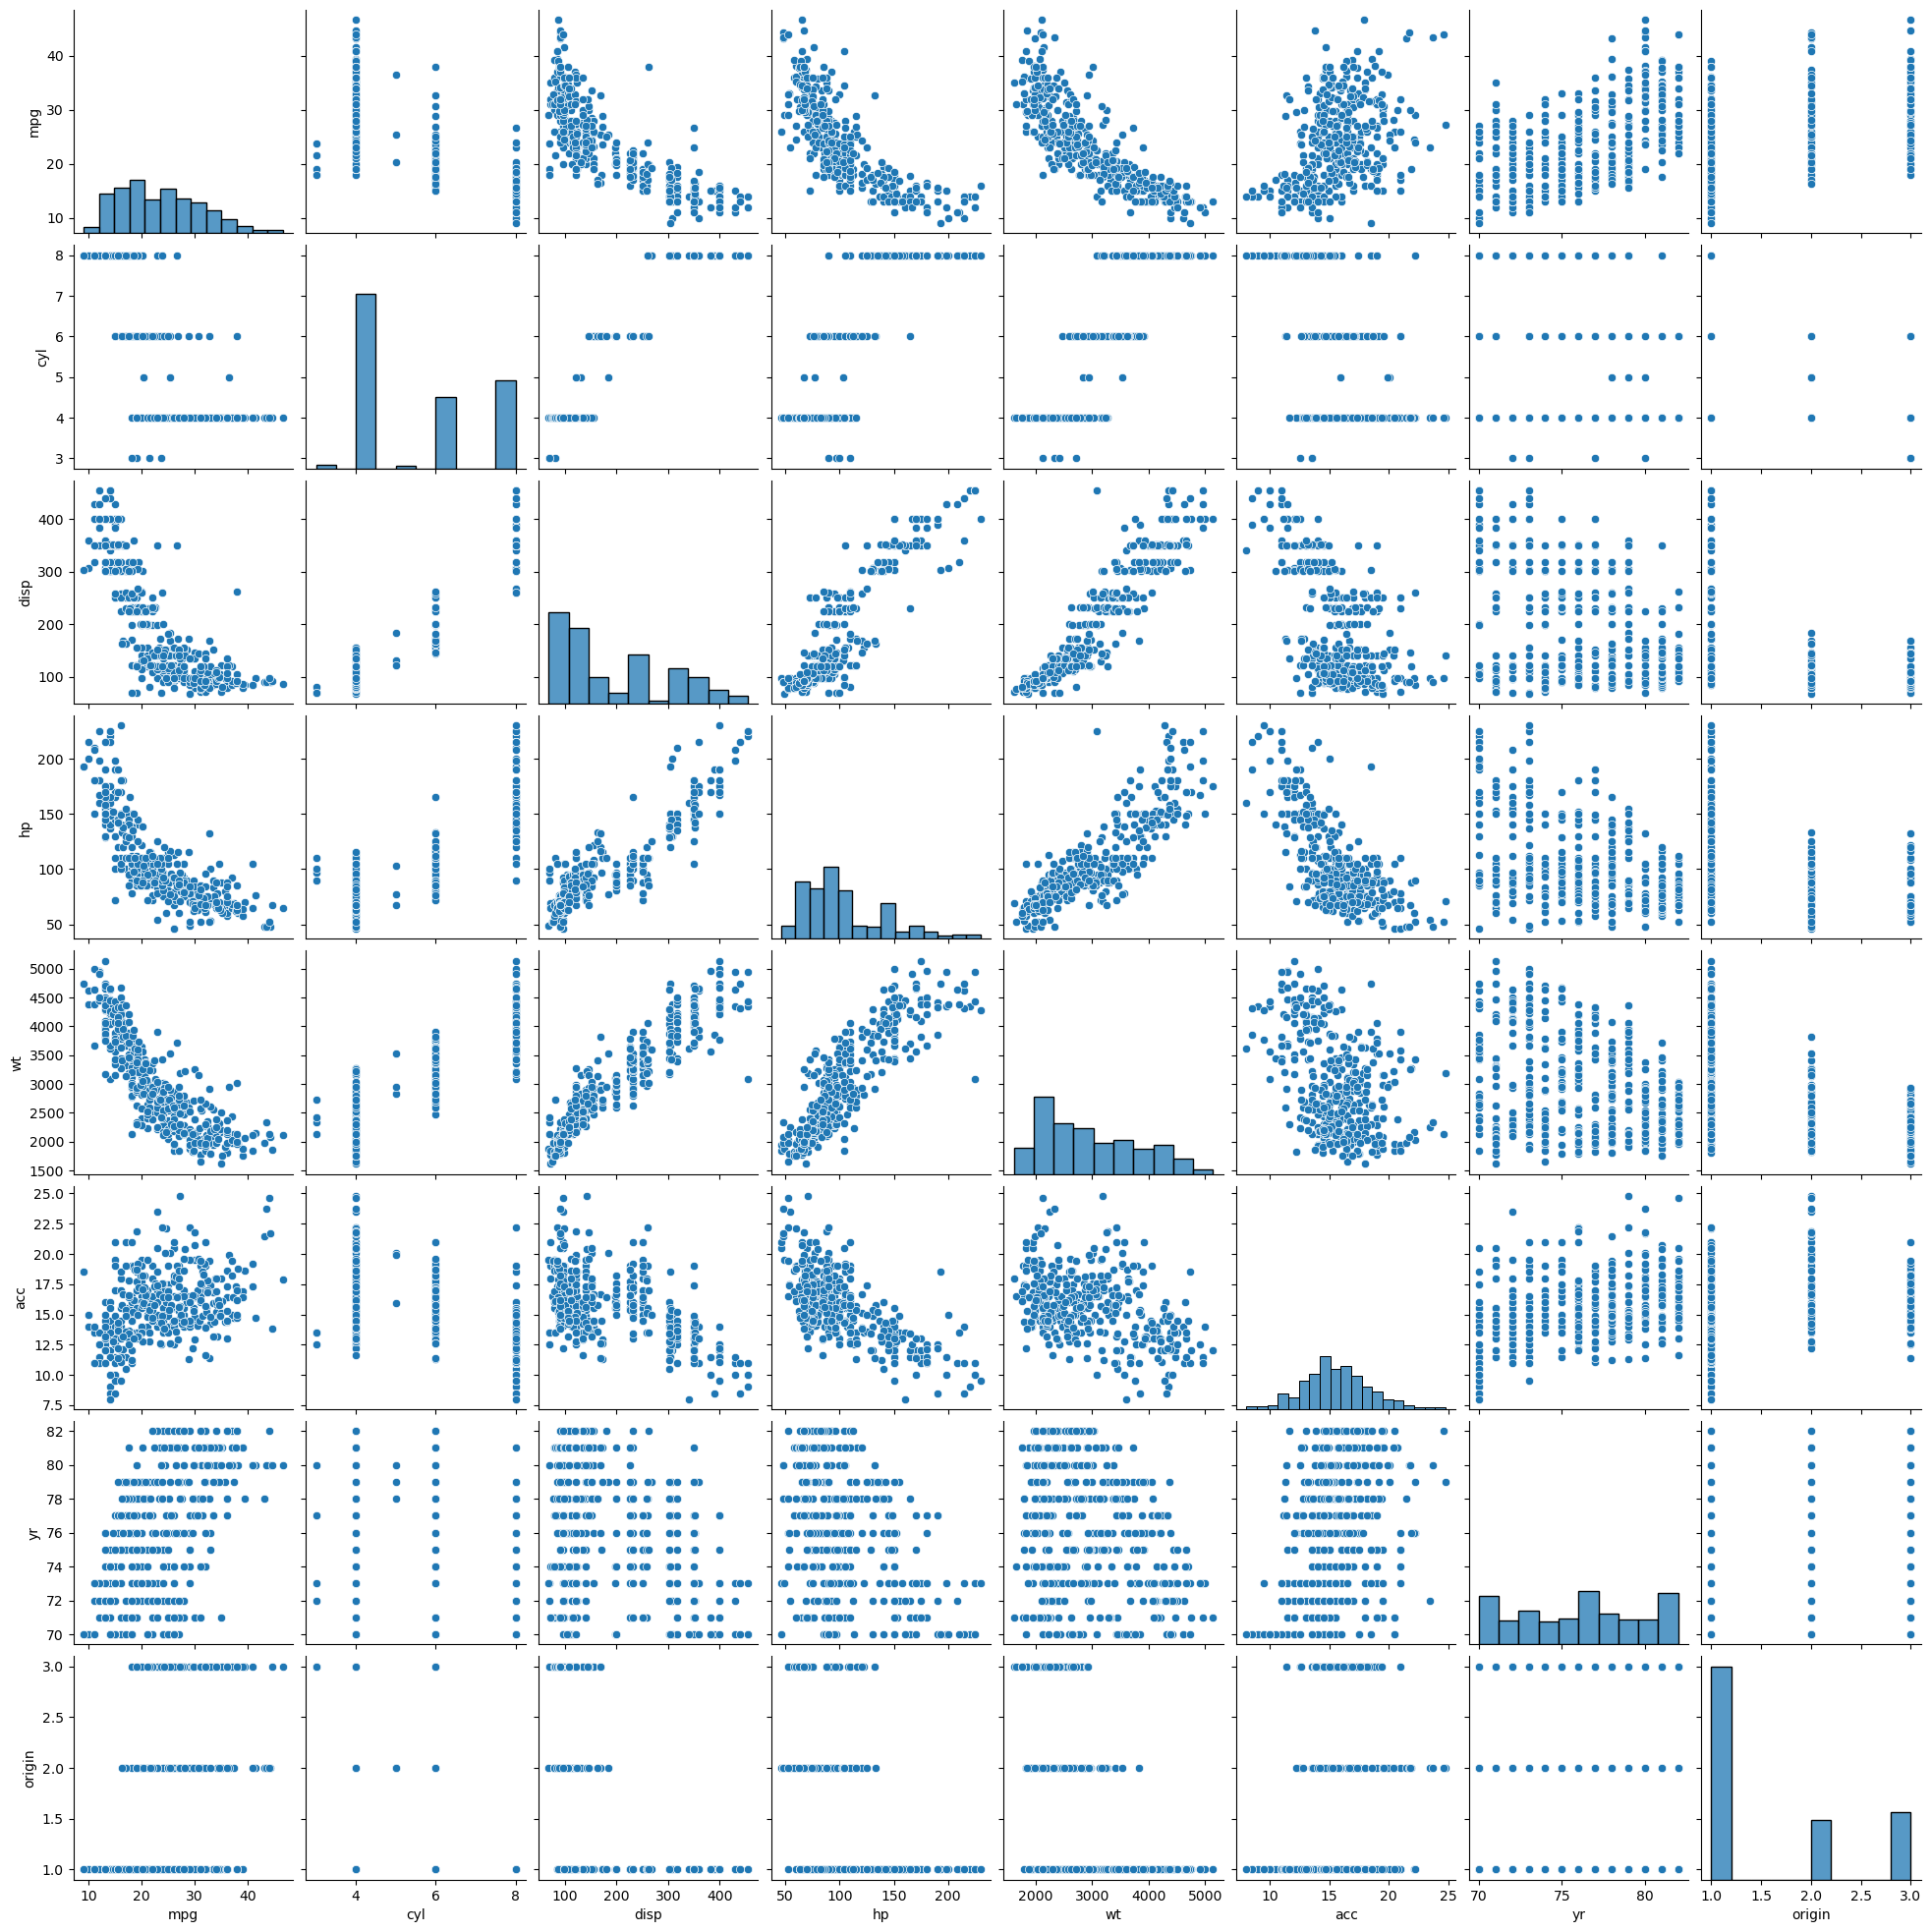

In [23]:
# Create a pairplot
sns.pairplot(merged_df)
plt.show()

#### Part 1.2 d - Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. 1 pts 

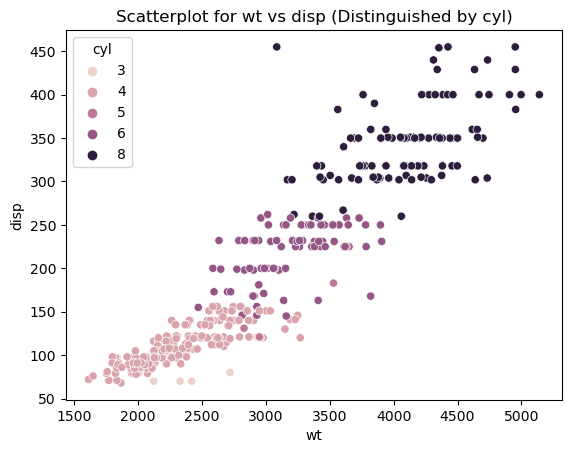

In [24]:
# Create a scatterplot with 'cyl' as hue
sns.scatterplot(x='wt', y='disp', hue='cyl', data=merged_df)
plt.title('Scatterplot for wt vs disp (Distinguished by cyl)')
plt.show()

#### Part 1.2 e - Share insights for Q2.d. 1 pts

1.The cars having less number of cylinders are having less weight
2.Also we can observe that the cars having more cylinders are having more displacement
3.WE can observe that there is a positive linear correlation between the displacement and the weight

#### Part 1.2 f - Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’. 1 pts

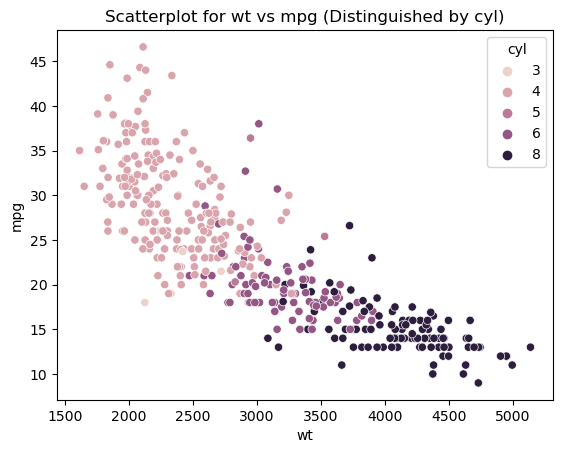

In [25]:
# Create a scatterplot with 'cyl' as hue
sns.scatterplot(x='wt', y='mpg', hue='cyl', data=merged_df)
plt.title('Scatterplot for wt vs mpg (Distinguished by cyl)')
plt.show()

#### Part 1.2 g- Share insights for Q2.f. 1 pts

1.The cars having less no cylinders having more milege(mpg) compared to the one having more cylinders
2.We can observe it is showing negative linear correlation
3.It is quite opposite of the scatterplot which we observed with "wt" and "disp"

In [26]:
# Iterate through each column
for column in merged_df.columns:
    unique_values = merged_df[column].unique()
    
    # Print unique values for each column
    print(f"Unique values in '{column}': {unique_values}")

    # Check for unexpected values (non-numeric or outliers)
    unexpected_values = merged_df[~merged_df[column].apply(lambda x: isinstance(x, (int, float)))][column]
    if not unexpected_values.empty:
        print(f"Unexpected values in '{column}':")
        print(unexpected_values)
    print("\n")

Unique values in 'car_name': ['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'ford pinto'
 'plymouth satellite custom' 'ford torino 500' 'amc matador'
 'pontiac catalina brougham' 'dodge monaco (sw)'
 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111'
 'plymouth cricket' 'toyot

#### Part 1.3 a - Apply K-Means clustering for 2 to 10 clusters. 3 pts

In [27]:
from scipy.stats import zscore
from sklearn.cluster import KMeans

In [28]:
#Create a new dataframe with other features except the car name
merged_df_attr=merged_df.iloc[:,1:]

In [29]:
merged_df_attr.head()

mpg  cyl   disp     hp    wt   acc  yr  origin
0  18.0    8  307.0  130.0  3504  12.0  70       1
1  15.0    8  350.0  165.0  3693  11.5  70       1
2  18.0    8  318.0  150.0  3436  11.0  70       1
3  16.0    8  304.0  150.0  3433  12.0  70       1
4  17.0    8  302.0  140.0  3449  10.5  70       1

In [30]:
#Scale the dataframe by using the Z score
merged_df_scaled=merged_df_attr.apply(zscore)

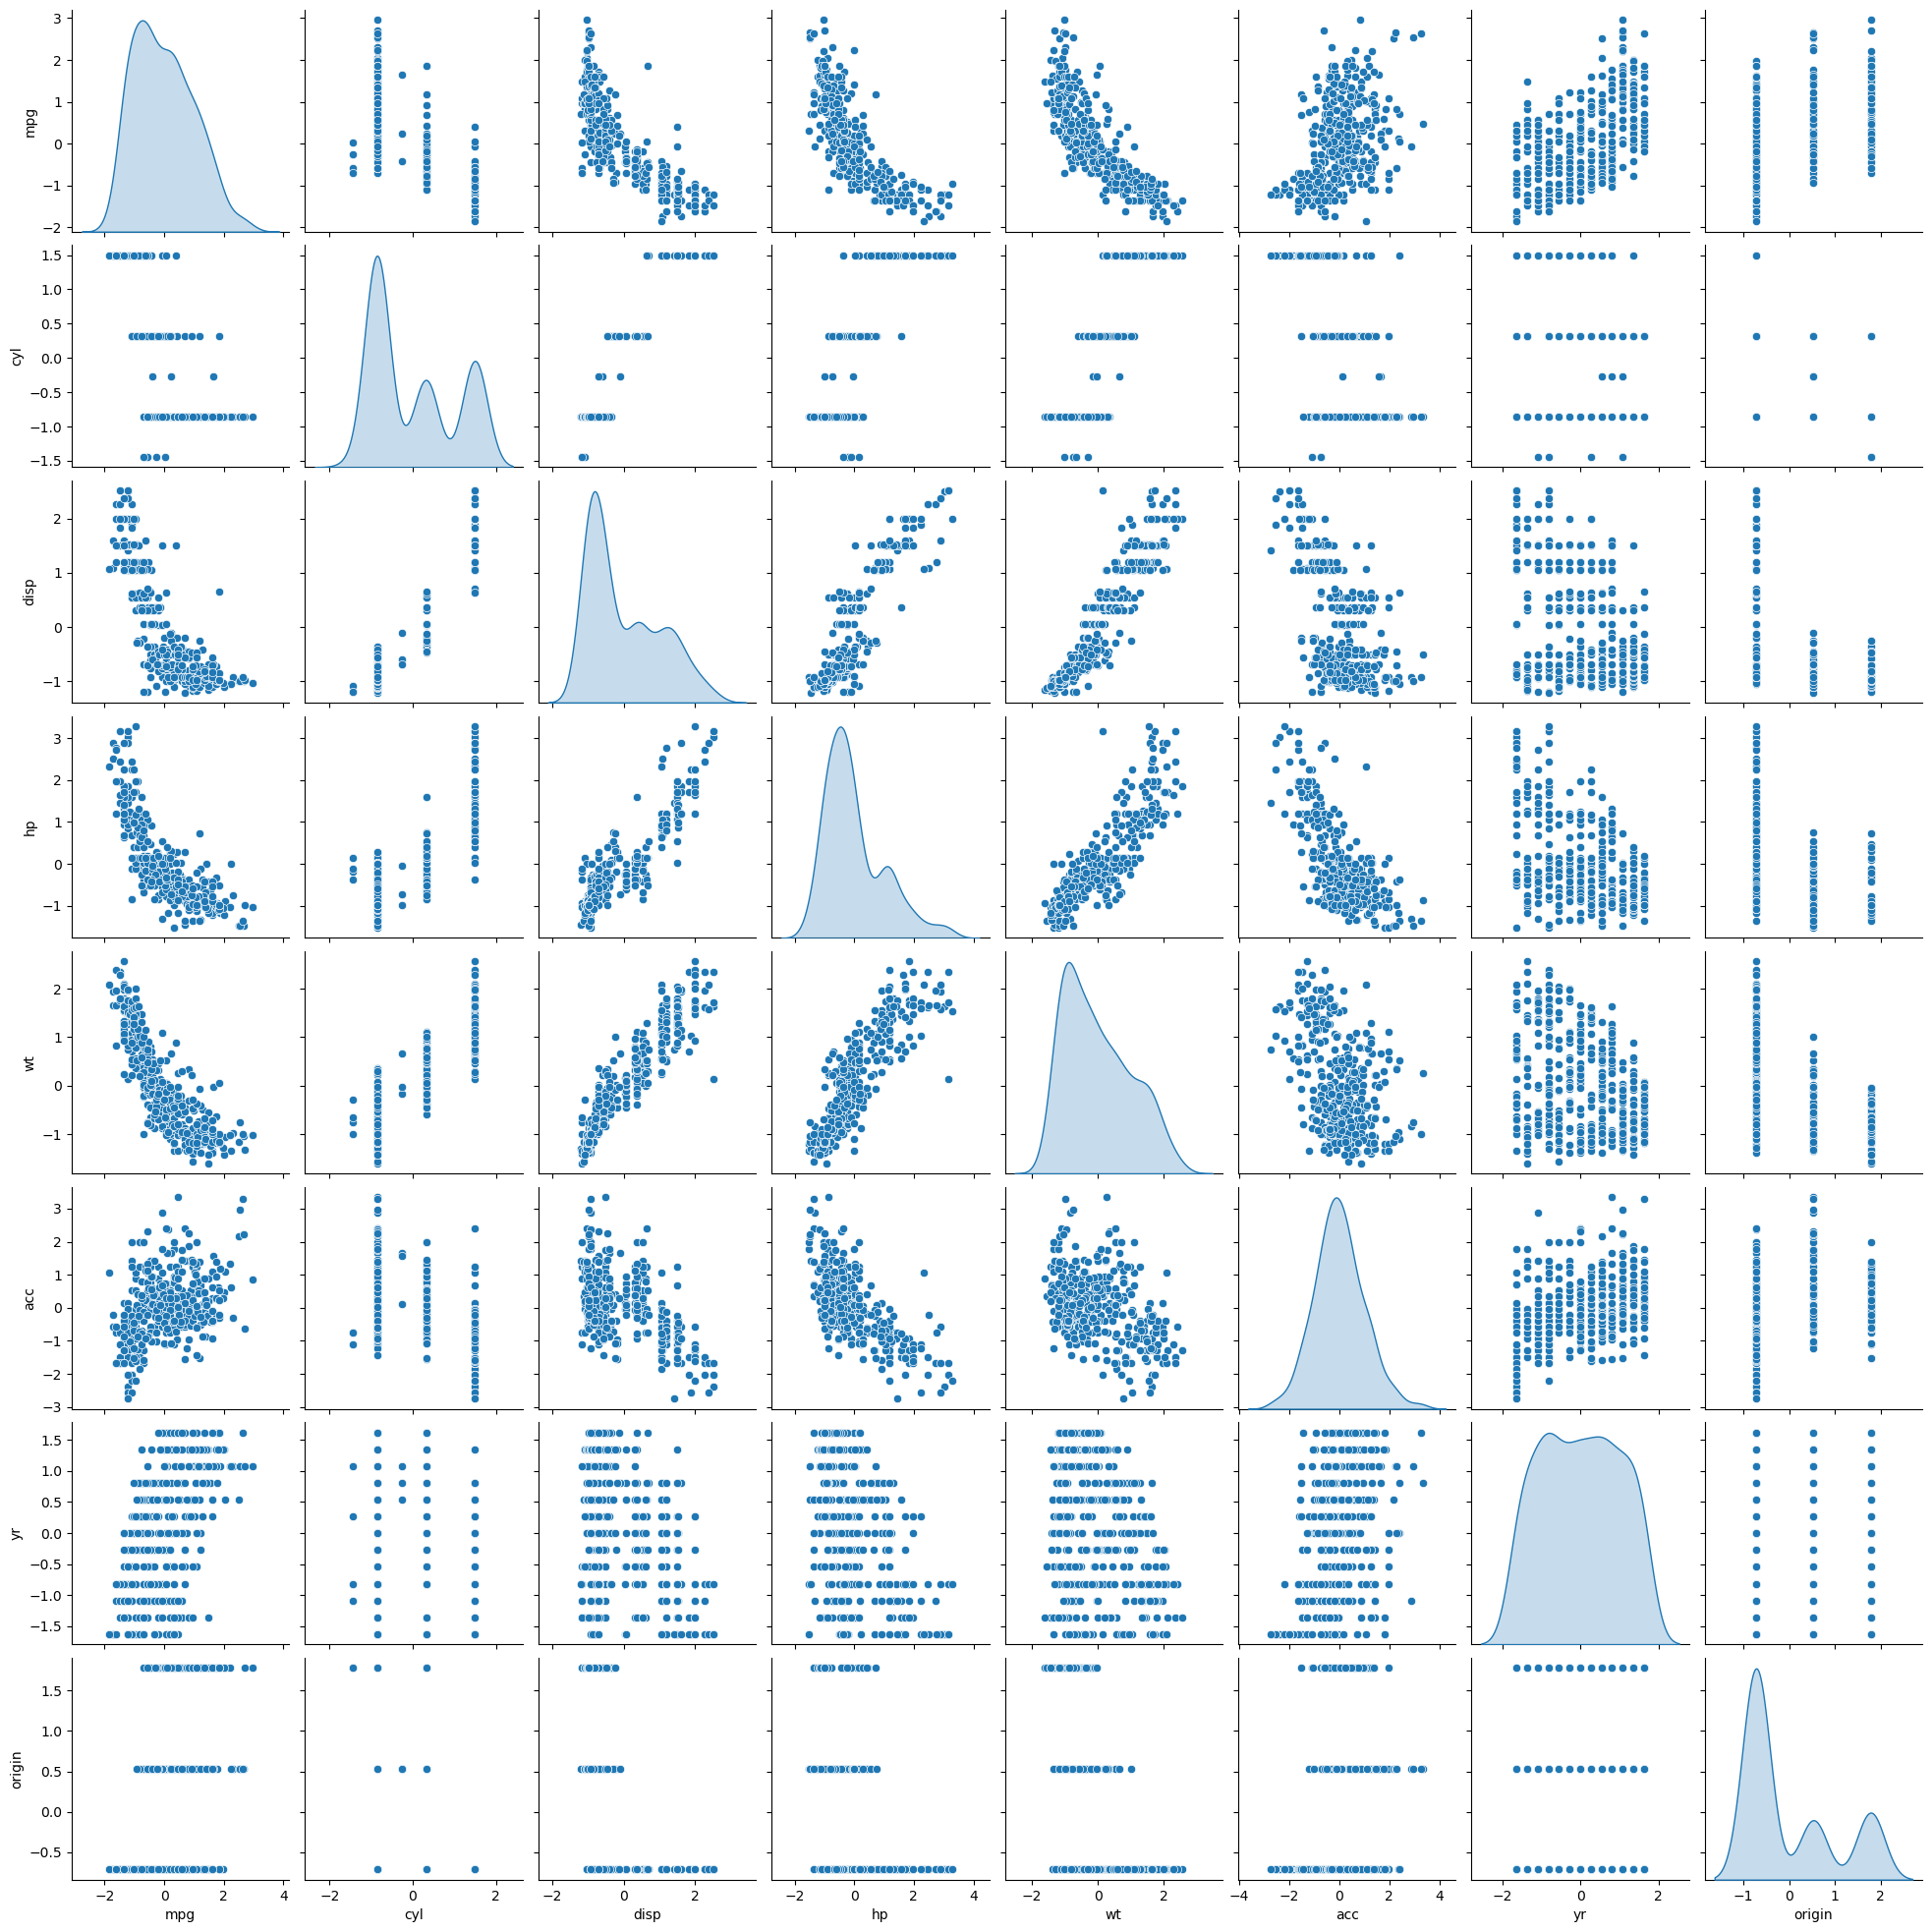

In [31]:
#Pairplot for the scaled attributes
sns.pairplot(merged_df_scaled,diag_kind='kde')


In [32]:
# Create a range of cluster numbers from 2 to 10
num_clusters_range = range(2, 11)

# Apply K-Means clustering for each number of clusters
for num_clusters in num_clusters_range:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    
    # Fit the model
    kmeans.fit(merged_df_scaled)
    
    # Add cluster labels to the DataFrame
    merged_df[f'cluster_{num_clusters}'] = kmeans.labels_

# Display the DataFrame with cluster labels
print(merged_df.head())

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

                    car_name   mpg  cyl   disp     hp    wt   acc  yr  origin  \
0  chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
1          buick skylark 320  15.0    8  350.0  165.0  3693  11.5  70       1   
2         plymouth satellite  18.0    8  318.0  150.0  3436  11.0  70       1   
3              amc rebel sst  16.0    8  304.0  150.0  3433  12.0  70       1   
4                ford torino  17.0    8  302.0  140.0  3449  10.5  70       1   

   cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  cluster_7  \
0          1          1          1          1          1          2   
1          1          1          1          1          1          2   
2          1          1          1          1          1          2   
3          1          1          1          1          1          2   
4          1          1          1          1          1          2   

   cluster_8  cluster_9  cluster_10  
0          2          4           4  
1         

#### Part 1.3 c - On the above visual, highlight which are the possible Elbow points. 1 pts

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

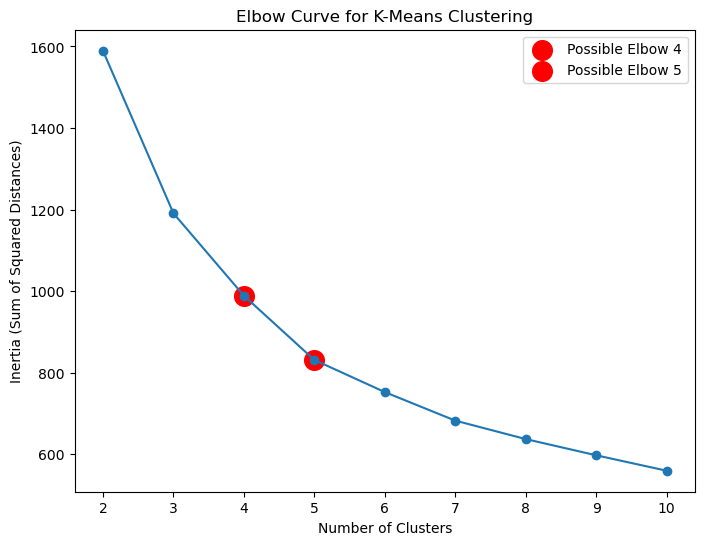

In [33]:
# Sum of squared distances (inertia) for each number of clusters
inertia = []

# Apply K-Means clustering for each number of clusters
for num_clusters in num_clusters_range:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    
    # Fit the model
    kmeans.fit(merged_df_scaled)
    
    # Append the inertia to the list
    inertia.append(kmeans.inertia_)

# Plot the elbow curve to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(num_clusters_range, inertia, marker='o')
plt.title('Elbow Curve for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')

# Highlight possible elbow points
possible_elbows = [4,5]  
for elbow in possible_elbows:
    plt.scatter(elbow, inertia[elbow - 2], color='red', marker='o', s=200, label=f'Possible Elbow {elbow}')

plt.legend()
plt.show()

#### Part 1.3 d - Train a K-means clustering model once again on the optimal number of clusters. 3 pts

In [34]:
# Assuming 'optimal_clusters' 
optimal_clusters = 4

# Initialize KMeans with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)

# Fit the model using the scaled features
kmeans_optimal.fit(merged_df_scaled)

# Add cluster labels to the DataFrame
merged_df['optimal_cluster'] = kmeans_optimal.labels_

# Display the DataFrame with cluster labels
print(merged_df.head())

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


                    car_name   mpg  cyl   disp     hp    wt   acc  yr  origin  \
0  chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
1          buick skylark 320  15.0    8  350.0  165.0  3693  11.5  70       1   
2         plymouth satellite  18.0    8  318.0  150.0  3436  11.0  70       1   
3              amc rebel sst  16.0    8  304.0  150.0  3433  12.0  70       1   
4                ford torino  17.0    8  302.0  140.0  3449  10.5  70       1   

   cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  cluster_7  \
0          1          1          1          1          1          2   
1          1          1          1          1          1          2   
2          1          1          1          1          1          2   
3          1          1          1          1          1          2   
4          1          1          1          1          1          2   

   cluster_8  cluster_9  cluster_10  optimal_cluster  
0          2          4        

#### Part 1.3 e - Add a new feature in the DataFrame which will have labels based upon cluster value 

In [35]:
# Add a new feature 'cluster_label' based on the cluster labels
merged_df['cluster_label'] = f'Cluster {merged_df["optimal_cluster"] + 1}'

# Display the DataFrame with the new 'cluster_label' feature
print(merged_df.head())

                    car_name   mpg  cyl   disp     hp    wt   acc  yr  origin  \
0  chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
1          buick skylark 320  15.0    8  350.0  165.0  3693  11.5  70       1   
2         plymouth satellite  18.0    8  318.0  150.0  3436  11.0  70       1   
3              amc rebel sst  16.0    8  304.0  150.0  3433  12.0  70       1   
4                ford torino  17.0    8  302.0  140.0  3449  10.5  70       1   

   cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  cluster_7  \
0          1          1          1          1          1          2   
1          1          1          1          1          1          2   
2          1          1          1          1          1          2   
3          1          1          1          1          1          2   
4          1          1          1          1          1          2   

   cluster_8  cluster_9  cluster_10  optimal_cluster  \
0          2          4       

#### Part 1.3 f -Plot a visual and color the datapoints based upon clusters. 2 pts 

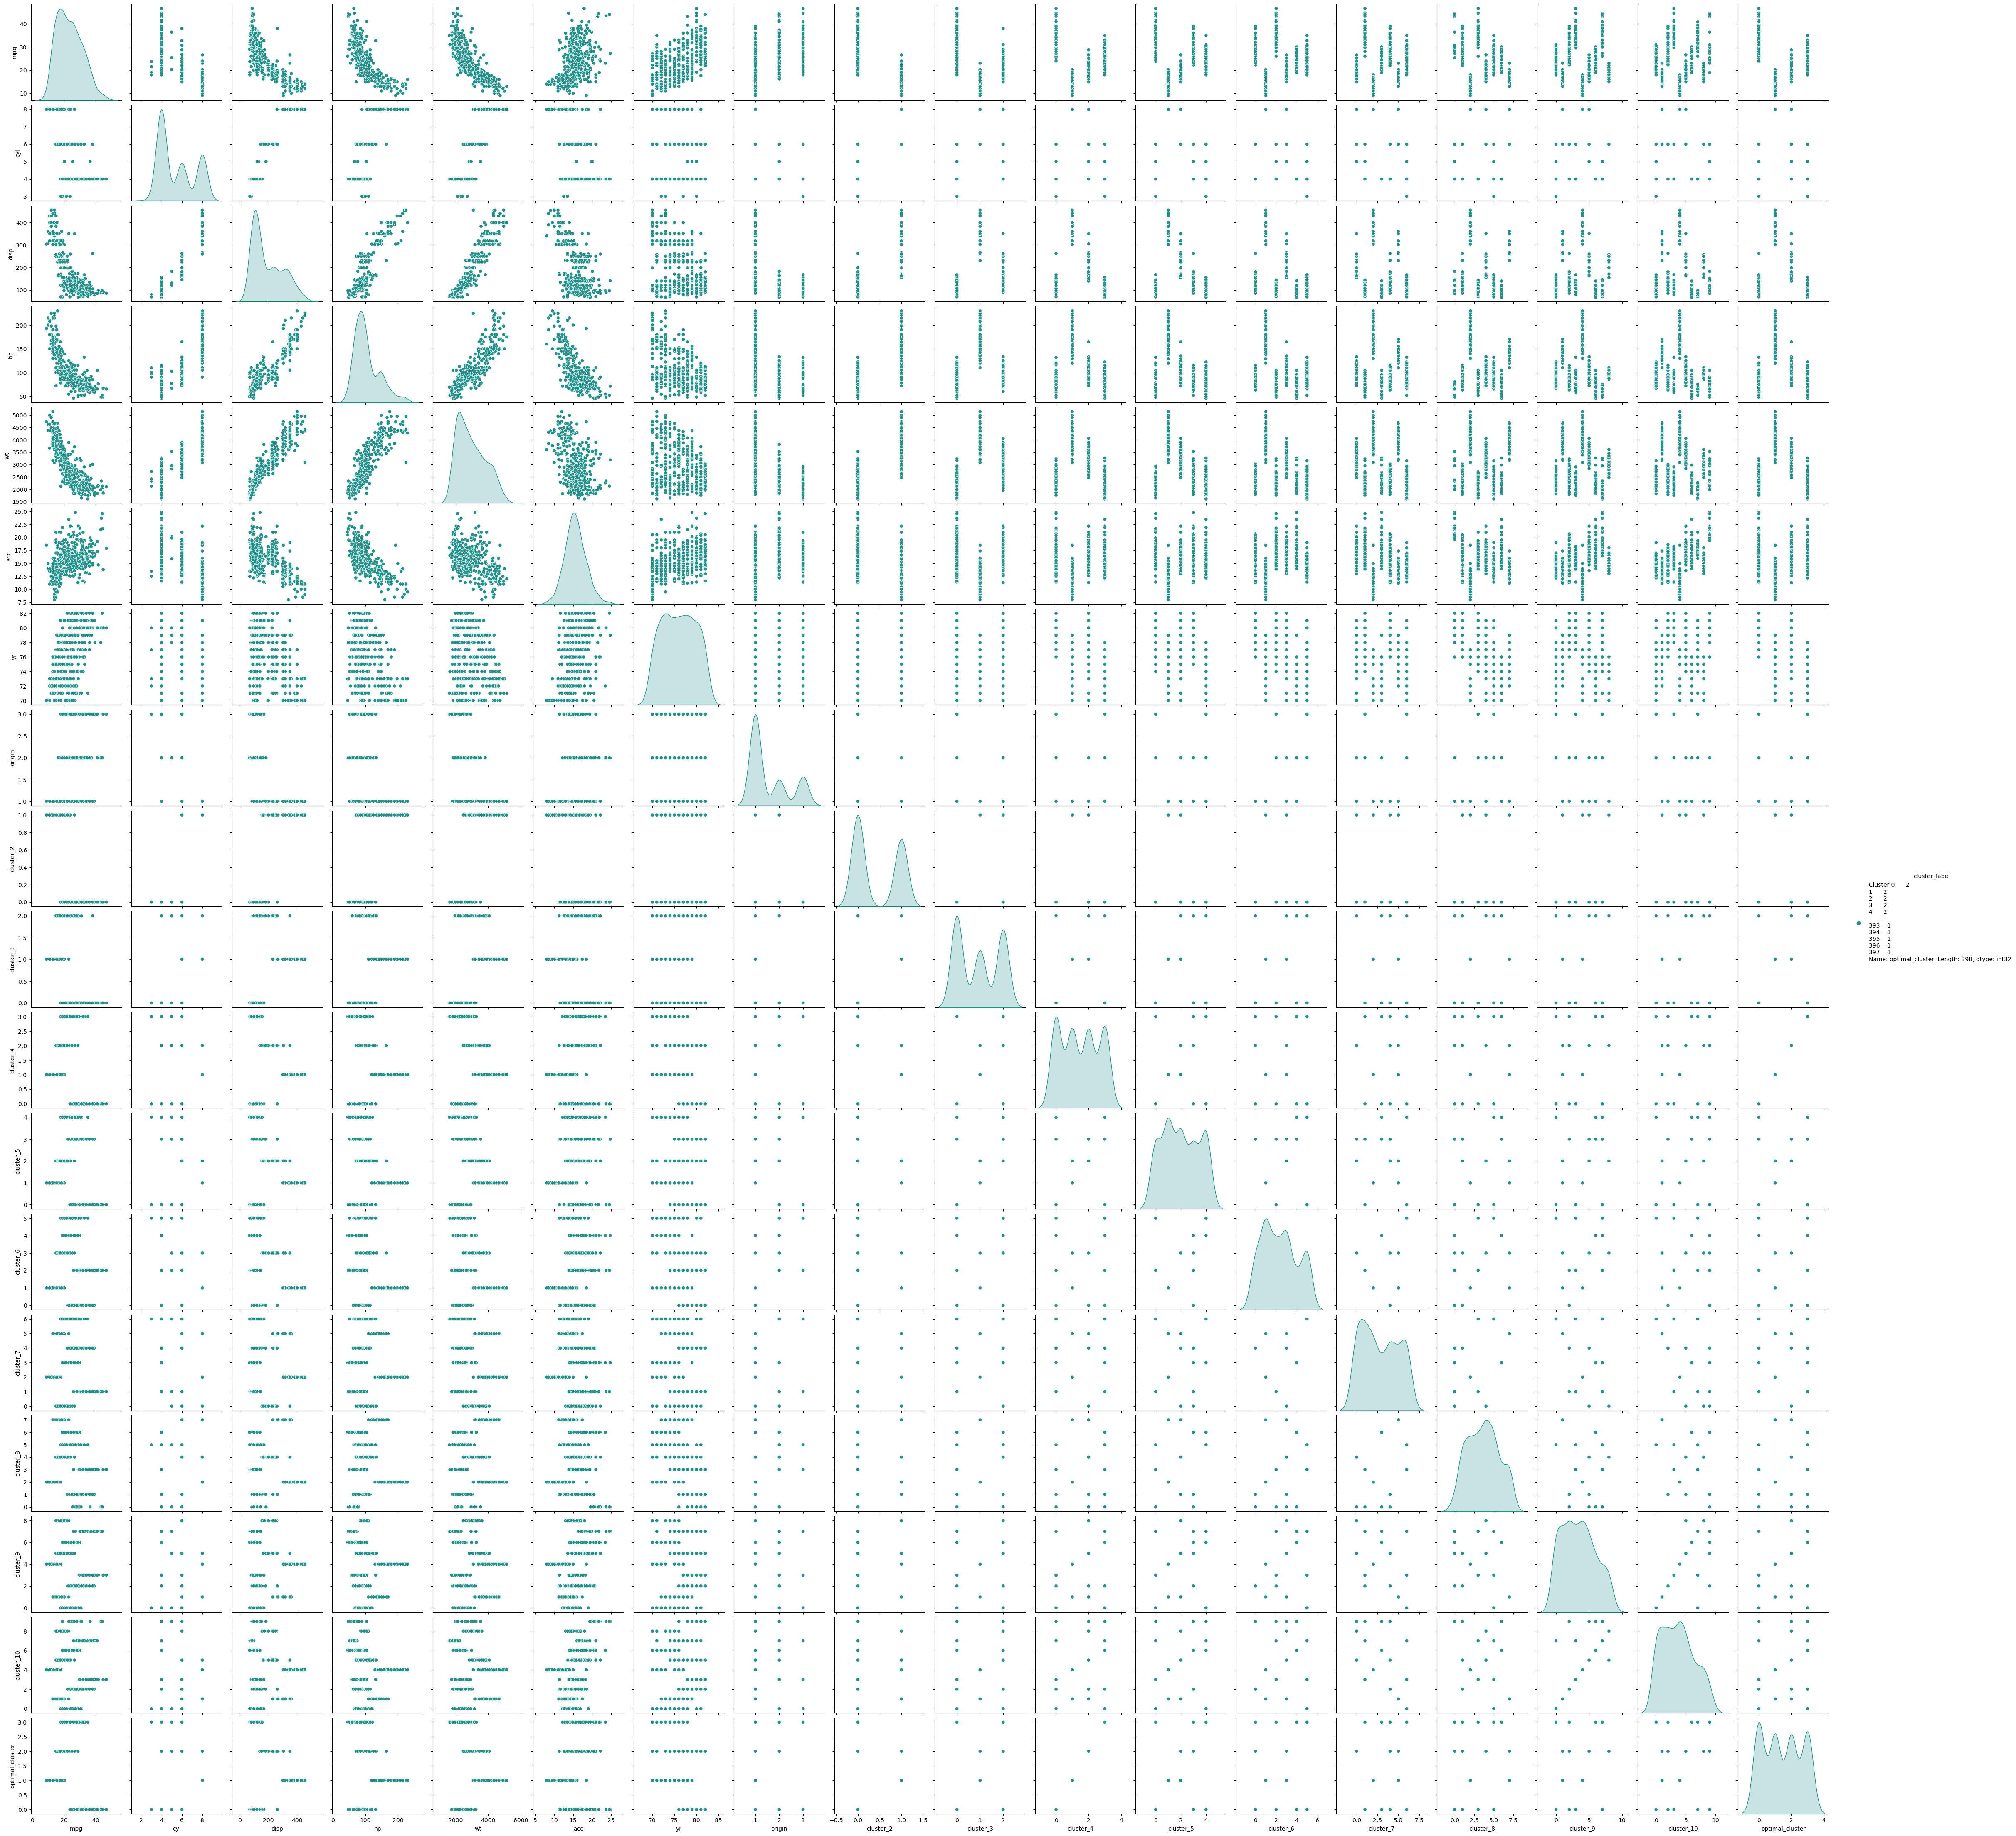

In [36]:
sns.pairplot(merged_df, hue='cluster_label', palette='viridis')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_8976\1412150177.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df[merged_df['optimal_cluster'] == (cluster - 1)][feature], hist=False, label=f'Cluster {cluster}')
C:\Users\HP\AppData\Local\Temp\ipykernel_8976\1412150177.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

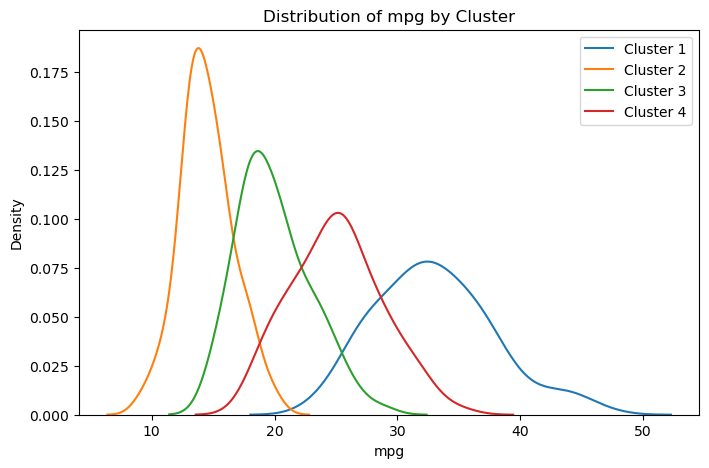

C:\Users\HP\AppData\Local\Temp\ipykernel_8976\1412150177.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df[merged_df['optimal_cluster'] == (cluster - 1)][feature], hist=False, label=f'Cluster {cluster}')
C:\Users\HP\AppData\Local\Temp\ipykernel_8976\1412150177.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

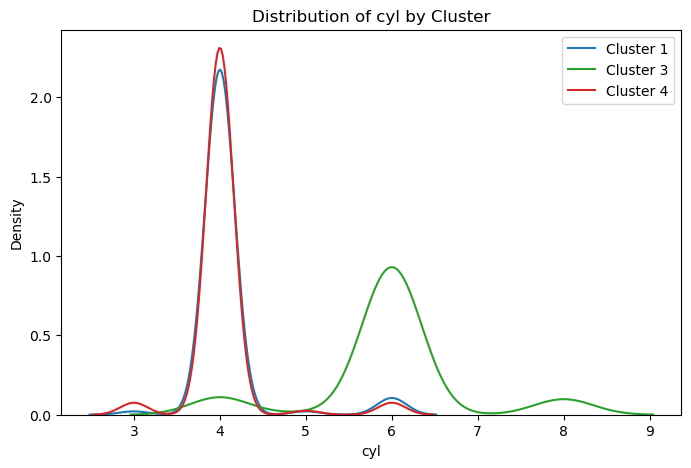

C:\Users\HP\AppData\Local\Temp\ipykernel_8976\1412150177.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df[merged_df['optimal_cluster'] == (cluster - 1)][feature], hist=False, label=f'Cluster {cluster}')
C:\Users\HP\AppData\Local\Temp\ipykernel_8976\1412150177.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

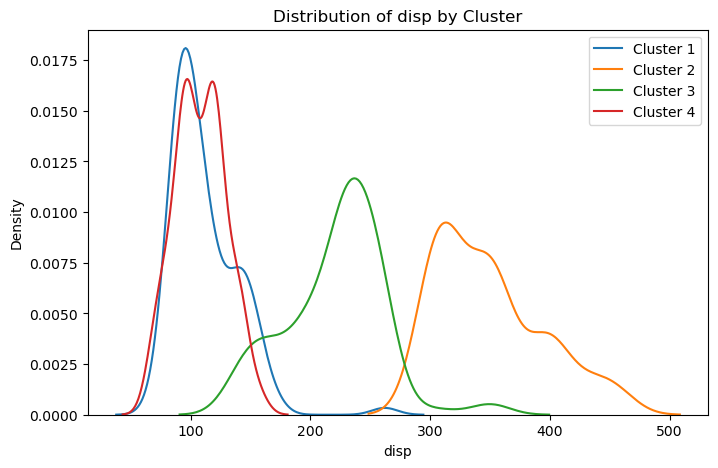

C:\Users\HP\AppData\Local\Temp\ipykernel_8976\1412150177.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df[merged_df['optimal_cluster'] == (cluster - 1)][feature], hist=False, label=f'Cluster {cluster}')
C:\Users\HP\AppData\Local\Temp\ipykernel_8976\1412150177.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

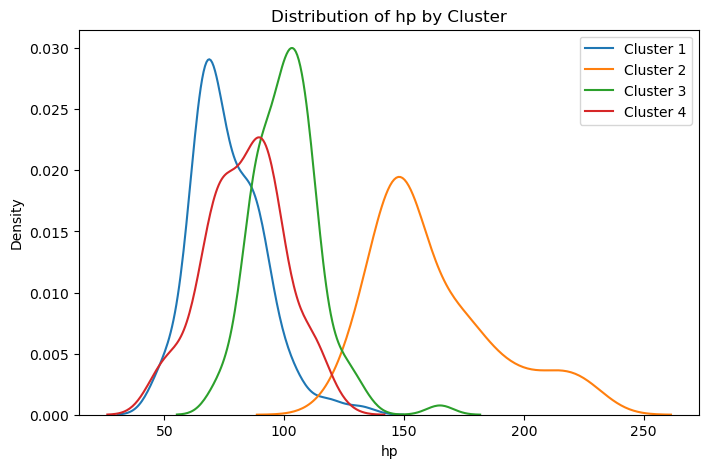

C:\Users\HP\AppData\Local\Temp\ipykernel_8976\1412150177.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df[merged_df['optimal_cluster'] == (cluster - 1)][feature], hist=False, label=f'Cluster {cluster}')
C:\Users\HP\AppData\Local\Temp\ipykernel_8976\1412150177.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

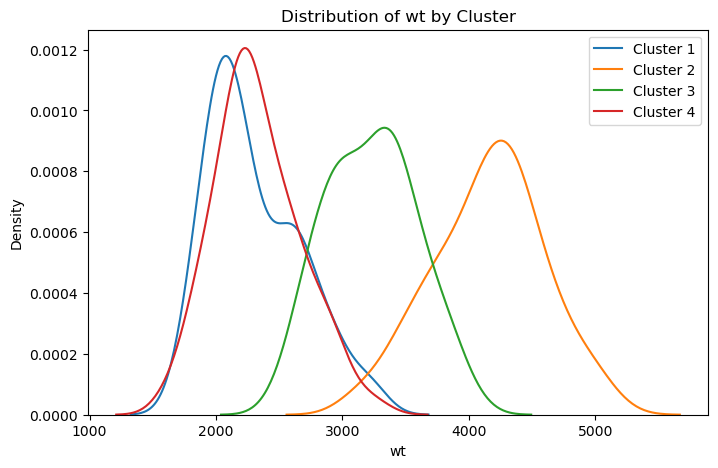

C:\Users\HP\AppData\Local\Temp\ipykernel_8976\1412150177.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df[merged_df['optimal_cluster'] == (cluster - 1)][feature], hist=False, label=f'Cluster {cluster}')
C:\Users\HP\AppData\Local\Temp\ipykernel_8976\1412150177.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

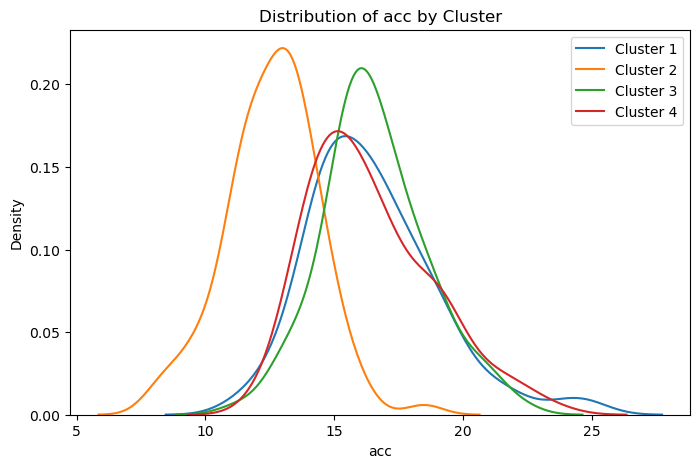

C:\Users\HP\AppData\Local\Temp\ipykernel_8976\1412150177.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df[merged_df['optimal_cluster'] == (cluster - 1)][feature], hist=False, label=f'Cluster {cluster}')
C:\Users\HP\AppData\Local\Temp\ipykernel_8976\1412150177.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

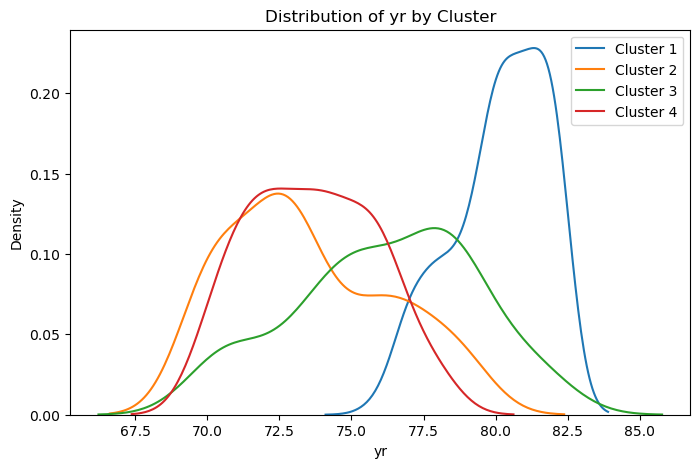

C:\Users\HP\AppData\Local\Temp\ipykernel_8976\1412150177.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df[merged_df['optimal_cluster'] == (cluster - 1)][feature], hist=False, label=f'Cluster {cluster}')
C:\Users\HP\AppData\Local\Temp\ipykernel_8976\1412150177.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

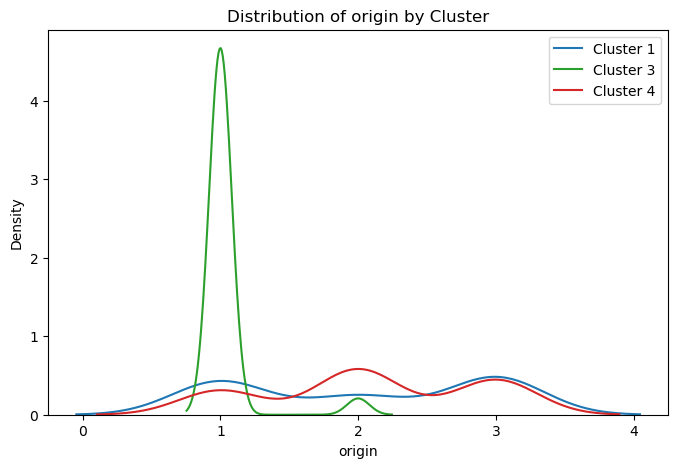

In [37]:
for feature in merged_df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 5))
    for cluster in range(1, optimal_clusters + 1):
        sns.distplot(merged_df[merged_df['optimal_cluster'] == (cluster - 1)][feature], hist=False, label=f'Cluster {cluster}')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.legend()
    plt.show()

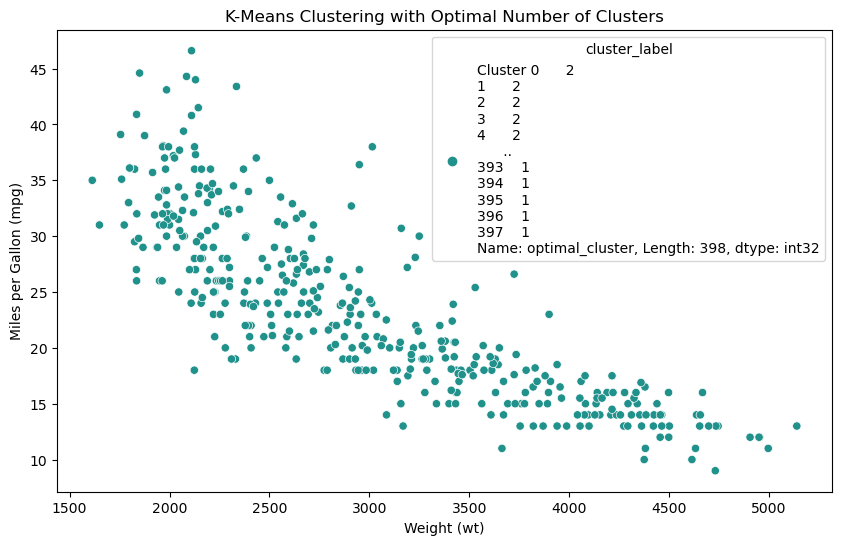

In [38]:
# Scatter plot with cluster labels colored
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wt', y='mpg', hue='cluster_label', data=merged_df, palette='viridis', legend='full')
plt.title('K-Means Clustering with Optimal Number of Clusters')
plt.xlabel('Weight (wt)')
plt.ylabel('Miles per Gallon (mpg)')
plt.show()

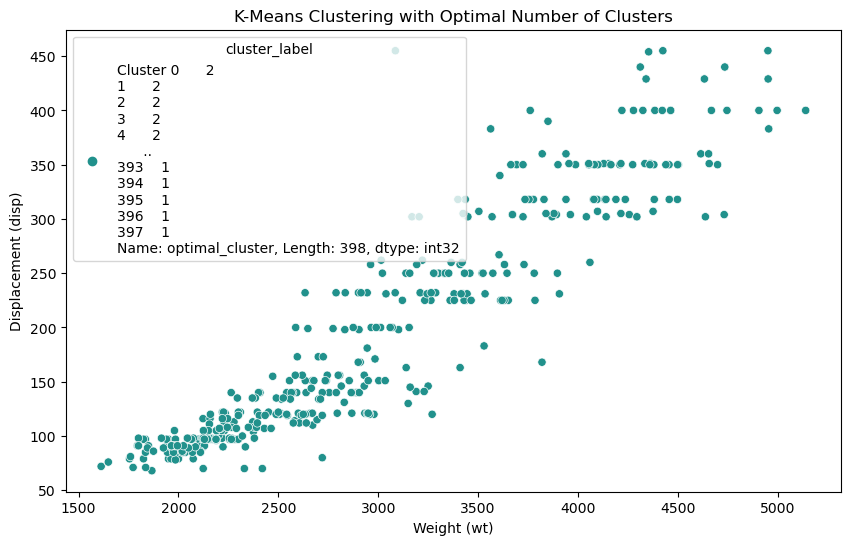

In [39]:
# Scatter plot with cluster labels colored for 'wt' and 'disp'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wt', y='disp', hue='cluster_label', data=merged_df, palette='viridis', legend='full')
plt.title('K-Means Clustering with Optimal Number of Clusters')
plt.xlabel('Weight (wt)')
plt.ylabel('Displacement (disp)')
plt.show()

#### Part 1.3 g - Pass a new DataPoint and predict which cluster it belongs to. 2 pts

In [40]:
# Placing the values of new data point
new_data_point = pd.Series({
    'mpg': 18.0,
    'cyl': 6,
    'disp': 225.0,
    'hp': 100.0,
    'wt': 3233,
    'acc': 15.4,
    'yr': 76,
    'origin': 1
})

# Scale the new data point using the same scaler used for training
scaled_new_data_point = (new_data_point - merged_df_attr.mean()) / merged_df_attr.std()

# Reshape the new data point to match the shape of the scaled features
scaled_new_data_point = scaled_new_data_point.values.reshape(1, -1)

# Predict the cluster label for the new data point
predicted_cluster = kmeans_optimal.predict(scaled_new_data_point)[0]

# Add the cluster label to the new data point
new_data_point['predicted_cluster'] = predicted_cluster

# Display the new data point with the predicted cluster label
print("New Data Point with Predicted Cluster:")
print(new_data_point)

New Data Point with Predicted Cluster:
mpg                    18.0
cyl                     6.0
disp                  225.0
hp                    100.0
wt                   3233.0
acc                    15.4
yr                     76.0
origin                  1.0
predicted_cluster       2.0
dtype: float64


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


#### Part 2. 1 a - Read ‘vehicle.csv’ and save as DataFrame. 1 pts

In [41]:
vehicle_df=pd.read_csv("vehicle.csv")
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [42]:
vehicle_df.shape

(846, 19)

In [43]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [44]:
vehicle_df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

#### Part 2.1 b- Check percentage of missing values and impute with correct approach. 1 pts 

In [45]:
# Check for missing values
missing_percentage_vehicle = vehicle_df.isnull().mean() * 100

# Print feature-wise percentages of missing values
print("Feature-wise Percentage of Missing Values:")
print(missing_percentage_vehicle)

Feature-wise Percentage of Missing Values:
compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_8976\3072058327.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = vehicle_df.corr()


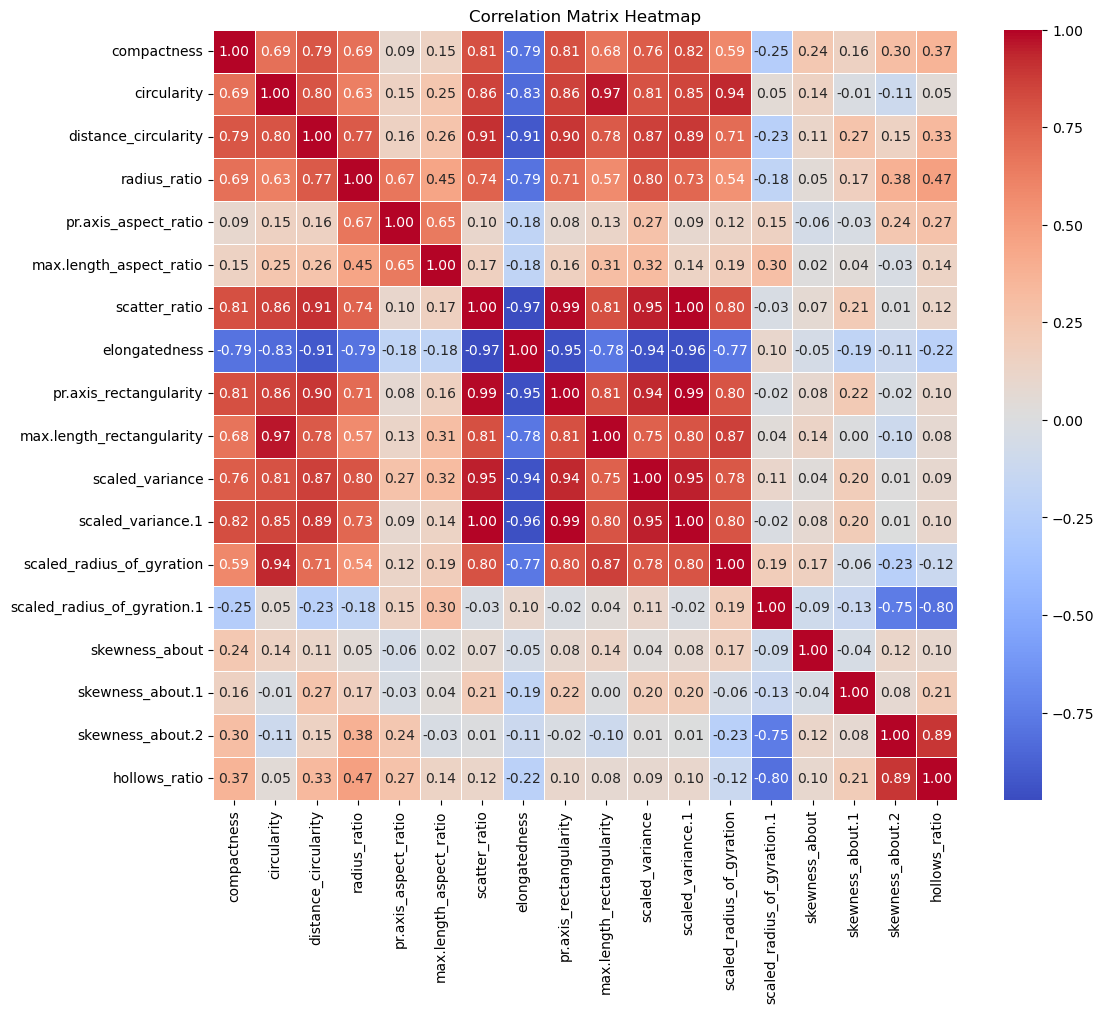

In [46]:
# Checking the correlation
correlation_matrix = vehicle_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [47]:
for column in vehicle_df.columns:
    unique_values = vehicle_df[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")

Unique values for compactness:
[ 95  91 104  93  85 107  97  90  86  88  89  94  96  99 101  84  87  83
 102  80 100  82 106  81 119  78  92  98 103  77  73  79 110 108 109 111
 105 112 116 113 117 115  76 114]

Unique values for circularity:
[48. 41. 50. 44. nan 43. 34. 36. 46. 42. 49. 55. 54. 56. 47. 37. 39. 53.
 45. 38. 35. 40. 59. 52. 51. 58. 57. 33.]

Unique values for distance_circularity:
[ 83.  84. 106.  82.  70.  73.  66.  62.  98.  74.  85.  79. 103.  51.
  77. 100.  75.  53.  64. 105.  80.  54.  63. 107.  nan  72.  86.  68.
 104.  87.  76.  81.  71. 101.  96.  78. 108.  91.  89.  94.  92.  60.
  57.  65.  50.  88. 109.  95.  90.  58.  69.  47.  40.  59. 110.  93.
 102. 112.  61.  42.  49.  44.  52.  55.]

Unique values for radius_ratio:
[178. 141. 209. 159. 205. 172. 173. 157. 140.  nan 143. 136. 171. 144.
 203. 201. 109. 197. 186. 215. 153. 121. 148. 219. 154. 119. 193. 129.
 160. 151. 222. 177. 118. 306. 176. 169. 214. 105. 137. 183. 220. 145.
 133. 122. 147. 115. 174. 228

In [48]:
# Check for null or NaN values
null_values = vehicle_df.isnull().sum()

# Check for special characters in each column
special_characters_count = {}

for column in vehicle_df.columns:
    # Check for special characters
    special_characters_count[column] = vehicle_df[column].apply(lambda x: any(char.isdigit() or char.isalpha() or char.isspace() for char in str(x))).sum()

# Display the results
print("Null or NaN values:")
print(null_values)

print("\nSpecial characters count:")
print(special_characters_count)

Null or NaN values:
compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

Special characters count:
{'compactness': 846, 'circularity': 846, 'distance_circularity': 846, 'radius_ratio': 846, 'pr.axis_aspect_ratio': 846, 'max.length_aspect_ratio': 846, 'scatter_ratio': 846, 'elongatedness': 846, 'pr.axis_rectangularity': 846, 'max.length_rectangularity': 846, 'scaled_variance': 846, 'scaled_variance.1': 846, 's

In [49]:
vehicle_df.drop('skewness_about', axis=1, inplace=True)
print("Column 'skewness_about' has been dropped.")

Column 'skewness_about' has been dropped.


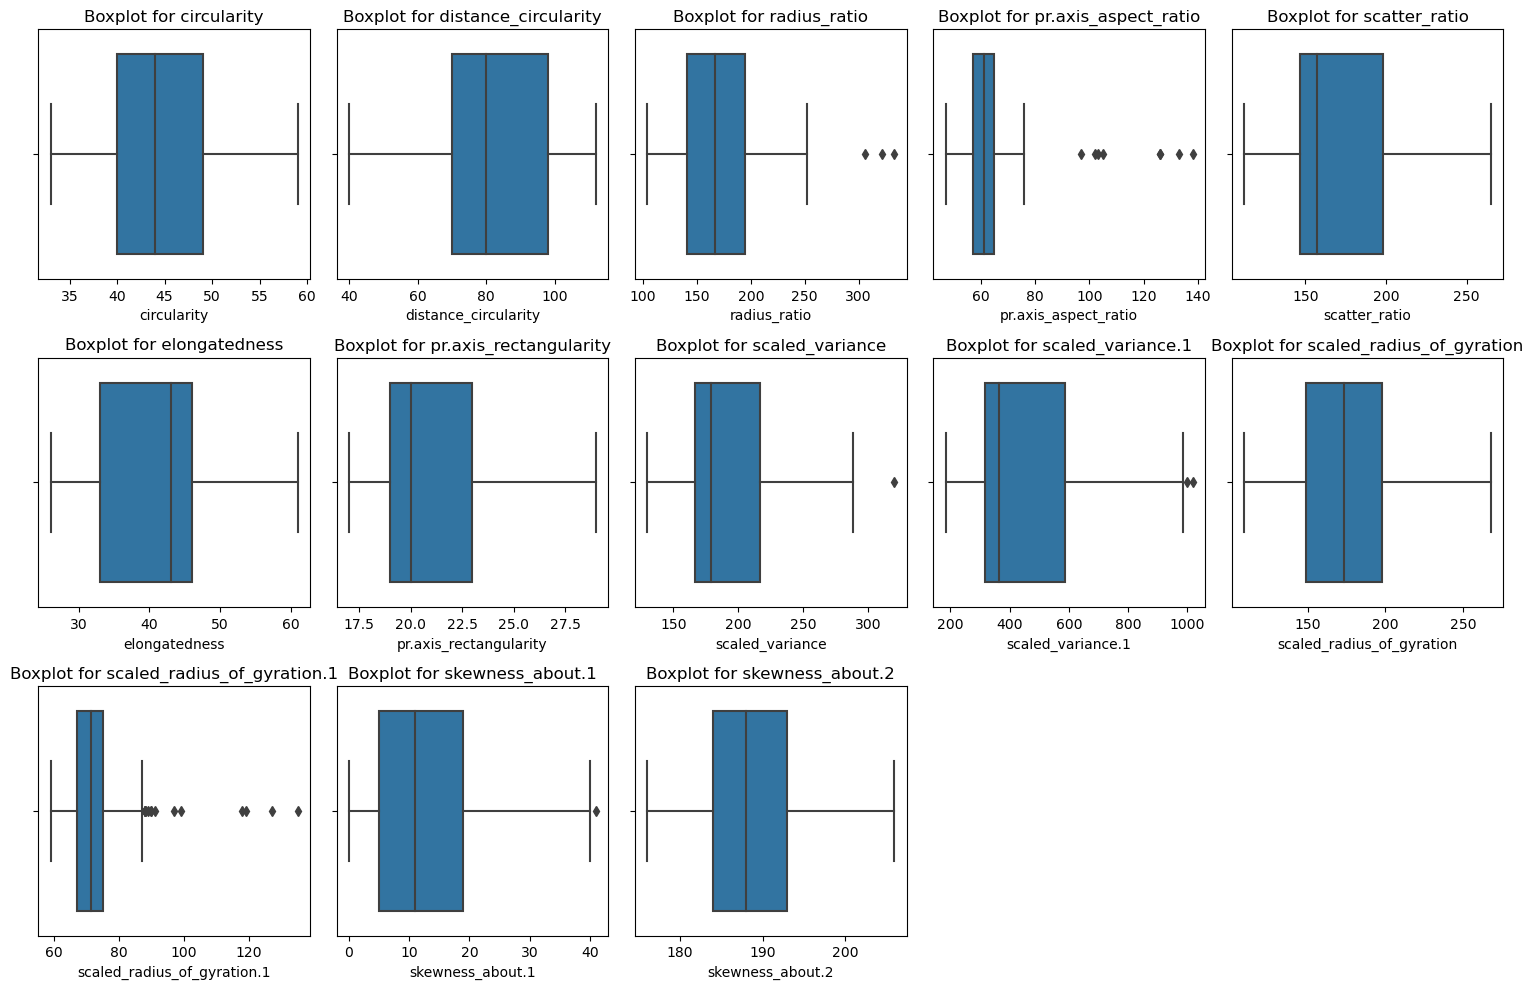

In [50]:
# Identify features with missing values
features_with_missing_values = vehicle_df.columns[vehicle_df.isnull().any()].tolist()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_with_missing_values, 1):
    plt.subplot(3, 5, i) 
    sns.boxplot(x=feature, data=vehicle_df)
    plt.title(f'Boxplot for {feature}')

plt.tight_layout()
plt.show()

In [51]:
# Columns to impute with median
columns_to_impute = ['radius_ratio', 'pr.axis_aspect_ratio', 'scaled_variance', 'scaled_radius_of_gyration.1','scaled_variance.1', 'skewness_about.1']

# Impute missing values with median
vehicle_df[columns_to_impute] = vehicle_df[columns_to_impute].fillna(vehicle_df[columns_to_impute].median())

# Verify that missing values have been imputed
print(vehicle_df[columns_to_impute].isnull().sum())

radius_ratio                   0
pr.axis_aspect_ratio           0
scaled_variance                0
scaled_radius_of_gyration.1    0
scaled_variance.1              0
skewness_about.1               0
dtype: int64


In [52]:
# Columns to impute with mean
columns_to_impute_mean = ['circularity', 'distance_circularity', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'scaled_radius_of_gyration', 'skewness_about.2']

# Impute missing values with mean
vehicle_df[columns_to_impute_mean] = vehicle_df[columns_to_impute_mean].fillna(vehicle_df[columns_to_impute_mean].mean())

# Verify that missing values have been imputed
print(vehicle_df[columns_to_impute_mean].isnull().sum())

circularity                  0
distance_circularity         0
scatter_ratio                0
elongatedness                0
pr.axis_rectangularity       0
scaled_radius_of_gyration    0
skewness_about.2             0
dtype: int64


In [53]:
print(vehicle_df.isnull().sum())

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


#### Part 2.1 c- Visualize a Pie-chart and print percentage of values for variable ‘class’. 2 pts

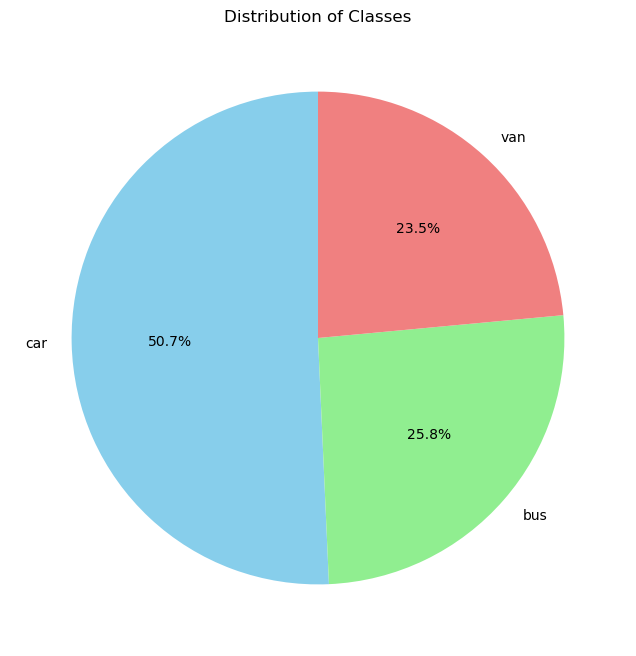

Percentage of values for variable 'class':
car    50.709220
bus    25.768322
van    23.522459
Name: class, dtype: float64


In [54]:
# Count the occurrences of each class
class_counts = vehicle_df['class'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Classes')
plt.show()

# Print the percentage of values for each class
print("Percentage of values for variable 'class':")
print(class_counts / len(vehicle_df) * 100)

#### Part 2.1 d - Check for duplicate rows in the data and impute with correct approach. 1 pts

In [55]:
# Check for duplicate rows
duplicate_rows = vehicle_df.duplicated()

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicate_rows.sum())

# Remove duplicate rows
vehicle_df = vehicle_df.drop_duplicates()

# Verify that duplicate rows have been removed
print("Number of duplicate rows after removal:", vehicle_df.duplicated().sum())

Number of duplicate rows: 0
Number of duplicate rows after removal: 0


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [57]:

X = vehicle_df.drop('class', axis=1)  # Features
Y = vehicle_df['class']  # Target variable
# Print the shapes of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)
# Split the data into training and testing sets with stratification
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X: (846, 17)
Shape of Y: (846,)
Shape of X_train: (676, 17)
Shape of X_test: (170, 17)
Shape of Y_train: (676,)
Shape of Y_test: (170,)


#### Part 2.2 b - Standardize the Data. 1 pts

In [58]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

#### Part 2.3 a - Train a base Classification model using SVM. 1 pts

In [59]:
# Initialize the SVM classifier
svm_classifier = SVC(random_state=42)

# Train the model on the standardized training data
svm_classifier.fit(X_train_scaled, Y_train)

SVC(random_state=42)

#### Part 2.3 b - Print Classification metrics for train data. 

Accuracy on Train Data: 0.98
Classification Report on Train Data:
               precision    recall  f1-score   support

         bus       0.99      0.97      0.98       174
         car       0.99      0.97      0.98       343
         van       0.93      0.99      0.96       159

    accuracy                           0.98       676
   macro avg       0.97      0.98      0.98       676
weighted avg       0.98      0.98      0.98       676



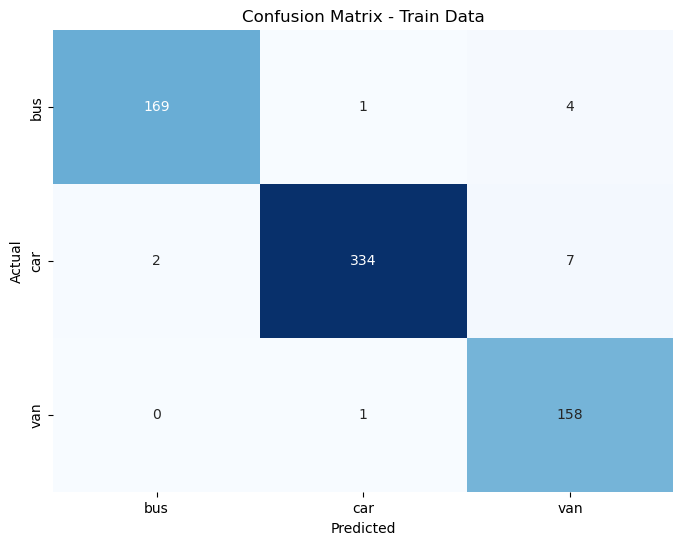

In [60]:
# Predict the labels for the training set
train_predictions = svm_classifier.predict(X_train_scaled)

# Calculate accuracy
accuracy = accuracy_score(Y_train, train_predictions)
print(f"Accuracy on Train Data: {accuracy:.2f}")

# Generate a classification report
classification_rep = classification_report(Y_train, train_predictions)
print("Classification Report on Train Data:\n", classification_rep)

# Get the confusion matrix
conf_matrix = confusion_matrix(Y_train, train_predictions)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title('Confusion Matrix - Train Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Part 2.3 c - Apply PCA on the data with 10 components. 3 pts

In [61]:
# Instantiate PCA with 10 components
pca = PCA(n_components=10)

# Fit and transform the data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [62]:
# Train SVM classifier on PCA-transformed data
svm_classifier_pca = SVC(kernel='linear', random_state=42)
svm_classifier_pca.fit(X_train_pca, Y_train)

# Make predictions on the test set
test_predictions_pca = svm_classifier_pca.predict(X_test_pca)

#### Part 2.3 d - Visualize Cumulative Variance Explained with Number of Components. 2 pts

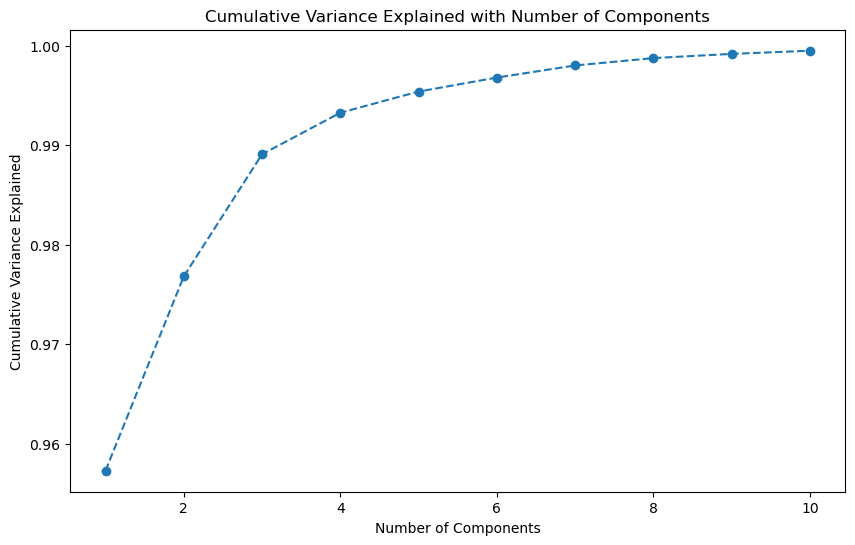

In [63]:
# Get cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Cumulative Variance Explained with Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

#### Part 2.3 e - Draw a horizontal line on the above plot to highlight the threshold of 90%. 1 pts

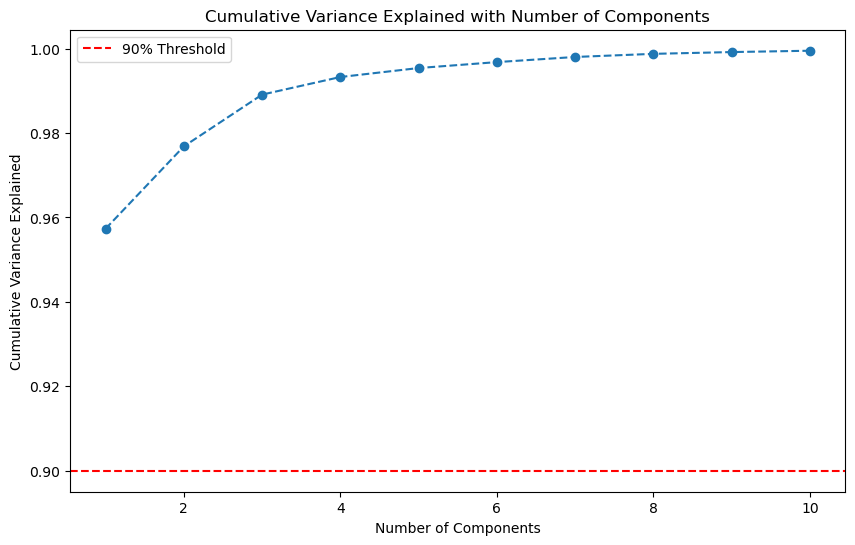

In [64]:
# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Threshold')
plt.title('Cumulative Variance Explained with Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.show()

#### Part 2.3 f - Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained. 2 pts

In [65]:
# Apply PCA on the scaled data with 90% variance explained
pca = PCA(0.90)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print the number of components selected
print("Number of components selected:", pca.n_components_)

Number of components selected: 4


#### Part 2.3 g - Train SVM model on components selected from above step. 1 pts

In [66]:
# Initialize the SVM classifier
svm_classifier = SVC(random_state=42)

# Train the SVM model on the PCA-transformed data
svm_classifier.fit(X_train_pca, Y_train)

# Print a message indicating that the SVM model has been trained
print("SVM model trained on PCA-transformed data.")

SVM model trained on PCA-transformed data.


#### Part 2.3 h - Print Classification metrics for train data of above model and share insights. 2 pts

Classification Metrics for Train Data:
              precision    recall  f1-score   support

         bus       0.84      0.63      0.72       174
         car       0.84      0.88      0.86       343
         van       0.62      0.74      0.68       159

    accuracy                           0.78       676
   macro avg       0.77      0.75      0.75       676
weighted avg       0.79      0.78      0.78       676



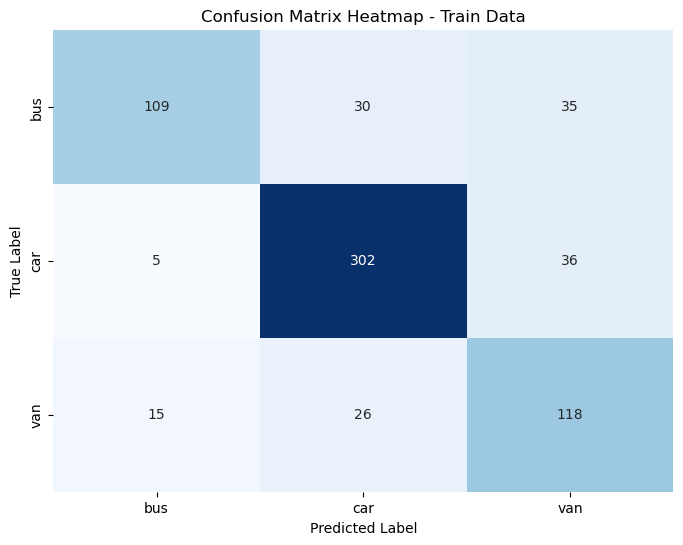

In [67]:
# Predict the labels for the training set
Y_train_pred = svm_classifier.predict(X_train_pca)

# Print classification metrics
print("Classification Metrics for Train Data:")
print(classification_report(Y_train, Y_train_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_train, Y_train_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title("Confusion Matrix Heatmap - Train Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Insights:
The SVM model demonstrates good accuracy at 78%, with particularly strong performance in classifying 'car' instances. However, there is room for improvement in accurately identifying 'bus' instances, where precision and recall are lower. The 'van' class shows moderate performance. Fine-tuning the model and evaluating on a separate test dataset are recommended for better generalization to new, unseen data.

#### Part 2.4 a - Train another SVM on the components out of PCA. Tune the parameters to improve performance. 2 pts

In [68]:
# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly','sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Create an SVM model
svm_model = SVC(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train_pca, Y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Train SVM with best parameters on the entire training set
best_svm_model = grid_search.best_estimator_
best_svm_model.fit(X_train_pca, Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


SVC(C=10, gamma=0.1, random_state=42)

#### Part 2.4 b- Share best Parameters observed from above step. 1 pts

In [69]:
# Access the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


#### Part 2.4 c- Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights. 2 pts


Best SVM Model Classification Metrics (Train Data):
              precision    recall  f1-score   support

         bus       0.88      0.81      0.84       174
         car       0.87      0.91      0.89       343
         van       0.75      0.74      0.74       159

    accuracy                           0.84       676
   macro avg       0.83      0.82      0.83       676
weighted avg       0.84      0.84      0.84       676



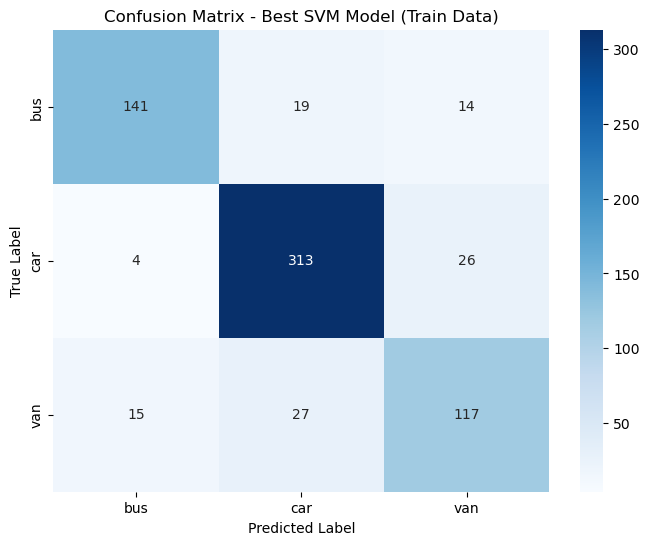

In [75]:
# Train SVM with best parameters on the entire training set
best_svm_model = grid_search.best_estimator_
best_svm_model.fit(X_train_pca, Y_train)

# Predictions on Training Data for Best SVM Model
train_predictions_best_svm = best_svm_model.predict(X_train_pca)

# Classification Metrics for Best SVM Model
print("\nBest SVM Model Classification Metrics (Train Data):")
print(classification_report(Y_train, train_predictions_best_svm))
# Generate confusion matrix for Best SVM Model
conf_matrix_best_svm = confusion_matrix(Y_train, train_predictions_best_svm)

# Plotting the heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_svm, annot=True, fmt='d', cmap='Blues', xticklabels=best_svm_model.classes_, yticklabels=best_svm_model.classes_)
plt.title("Confusion Matrix - Best SVM Model (Train Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### Insights:
1.The base SVM model without PCA achieved the highest accuracy on the training data (0.98), but it might be overfitting.

2.SVM model with PCA and the best SVM model (tuned parameters and PCA) both showed similar performance with accuracies of 0.78 and 0.84, respectively.

3.The best SVM model, after tuning parameters and using PCA with 90% variance, demonstrates improved performance compared to the base SVM model.

In short we can say, incorporating PCA and tuning parameters helped improve the model's performance, and the best SVM model achieved the highest accuracy on the training data.

#### Part 2.5 a - Explain pre-requisite/assumptions of PCA. 2 pts 

The key prerequisites and assumptions for Principal Component Analysis (PCA) include:

Linearity: Assumes linear relationships between variables.

Mean-Centering: Data should be centered by subtracting variable means.

Scale Consistency: Standardize or normalize data for consistent scales.

High Variance Captured: Principal components capture most variance.

Orthogonality: Principal components are orthogonal (uncorrelated).

Large Variability: Components with larger eigenvalues are more important.

Normality (Optional): Works well with non-normally distributed data.

Noisy Data: Assumes variability is due to patterns, not noise.

Linear Relationships: Assumes linear relationships between variables.






#### Part 2.5 b - Explain advantages and limitations of PCA. 3 pts 

#### Limitations of PCA:

Linearity Assumption: PCA assumes linear relationships between variables, which might not hold in all cases.

Loss of Interpretability: Principal components are combinations of original features, and their physical meaning may be lost.

Sensitivity to Scaling: PCA is sensitive to the scale of variables, requiring standardization or normalization.

Outliers Impact: Outliers can significantly affect the results of PCA.

Non-Gaussian Data: PCA works optimally with Gaussian-distributed data; non-Gaussian data might require additional preprocessing.

Selecting Components: Choosing the number of components can be subjective and requires trade-offs between explained variance and model simplicity.

Assumes Orthogonality: The assumption of orthogonality may not always hold in real-world data.

Non-linear Relationships: PCA might not capture non-linear relationships between variables.

In summary, while PCA offers powerful dimensionality reduction and pattern identification, users should be aware of its assumptions and limitations in specific scenarios.







### ************************************************ The End*************************************************************